Notebook is copyright &copy; of [Ajay Tech](https://ajaytech.co). 

# [Linear Regression](https://ajaytech.co/linear-regression-in-python)

> <b>Summary</b> : Linear Regression is a basic Machine Learning Technique. On top of the basic technique itself, we will also be covering many statistical concepts that will be useful in evaluating models going forward as well. 

## Contents

- What is Regression
- Why Regression ?
- Solve a simple Regression problem in Python
- How did we get the straight line ( fit )
  - Residuals
  - Sum of Squares
- Boston Housing dataset
- Correlation
- p value
  - Null Hypothesis
  - What is an optimum p-value
- r-squared (r2)
  - How is r2 calculated
- r-squared adjustedr
- RMSE ( Root Mean Square Error )
- Accuracy of the model
  - Funnel Problem
  - Normal Q-Q plot
- Assumptions of Linear model
  - Multi-variate Normality
  - Multi-collinearity
  - Auto-correlation
  - Homescedasticity

### What is Regression

In Machine Learning, most problems are classified as supervised vs unsupervised learning. We will first focus on supervised learning algorithms and later work on unsupervised learning algorithms. Supervised learning is once again split into the following 2 groups
- Classification
- Regression

Given a particular height and weight, classify the person as either male or female. This is an example of classification. You are essentially trying to **classify** the person - in this case - as male or female based on certain characteristics.

In contrast, say you are trying to predict the body fat percentage based on height and weight - this is an example of a regression problem. What is the difference ? Body Fat % is a continuous variable - say it starts at a minimum of 2% (really lean) and can go all the way up to 50 % say (extremely obese) - as opposed to a categorical variable in the example above ( Male or Female ).

### Why Regression

If you are learning how to solve a regression problem for the first time, you probably need to understand why you need regression to start with. This is probably the simplest of the regression problems. Let's start with a simple data set - Swedish auto insurance claims. You can google it or get it from [kaggle](https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset). It is a very small data set with just 2 variables -
- Number of Claims
- Total payment for these claims ( in thousands )

<img src="./pics/swedish_auto_claims.png"/>

Claims come first and the settlement happens much later. Assuming these are claims this company receives per week, is there a way we can predict how much the company will end up paying, just based on the number of claims ?

**What value does this bring to the company ?**

Being able to predict the payment based on the number of claims gives a very good understanding of the companies expenses very much in advance.

**Why do you need machine learning for this problem ?**

Each claims is different - A fender bender claims costs a thousand dollars and a total could cost 20 grand. The type of claim does make for a good predictor, but let's just assume we don't have that at this point. Even if we had the type of claim, a fender bender can cost anywhere from 300 to 2000 dollars based on the severity of damage, the arbitration and several environmental factors. Essentially, there is no easy way to correlate the claims to the payment. If we tried to do this using some kind of IF, THEN logic, we would be going around in hoops.

### Solve Regression in Python

In [4]:
import pandas as pd

data = pd.read_csv("../data/insurance.csv", skiprows = 6, header = None, names=["claim_count","claim_value"])
data.head()

,claim_count,claim_value
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Looking OK - but since we are reading data from file, we have to ensure that Python is not reading integers as strings or other object types. Let's quickly verify if the data types are correct. 

In [20]:
data.dtypes

claim_count      int64
claim_value    float64
dtype: object

Looking good. Now, onto LinearRegression. Before we do that, we would have to install the Python package - scikit-learn. 

<pre>
> pip install scikit-learn

# or 

> conda install scikit-learn
</pre>

The module that we need to solve Linear Regression is **LinearRegression** from __linear_model__ package.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [6]:
model.fit(data["claim_count"],data["claim_value"])

ValueError: Expected 2D array, got 1D array instead:
array=[108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
model.fit(data[["claim_count"]],data["claim_value"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Our model is ready. Let's start predicting *claims* based on the *count* of claims. We have used the **fit** method to fit the model - to predict, we will be using the **predict** method. But before we do that, let's plot this out to understand what we have done so far. 

In [8]:
predict = model.predict(data[["claim_count"]])

In [9]:
slope = model.coef_
slope

array([3.41382356])

In [10]:
intercept   = model.intercept_
intercept

19.99448575911478

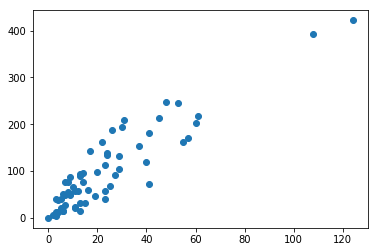

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter( data["claim_count"],data["claim_value"])

Linear Regression has already solve this problem for us - we just didn't realize it yet. The parameters ( also called co-efficients )

- slope
- intercept  

are the solution. 

[19.99448576] [429.65331297]


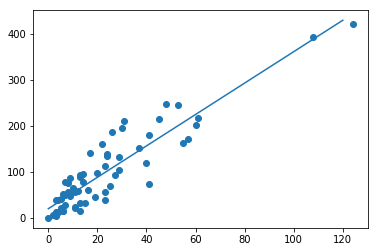

In [12]:
point_1 = slope*0 + intercept
point_2 = slope*120 + intercept

print ( point_1, point_2)

plt.scatter( data["claim_count"],data["claim_value"])
plt.plot([0,120], [point_1,point_2])

How did we get the straight line ?

<img src="./pics/y_mx_b.png"/>

A straight line can be defined mathematically using

Y = a X + b

where a is called the slope of the line and b is called the intercept. These are also called coefficients. The **fit** function of _LinearRegression_ has already arrived at these numbers ( slope and intercept ). It has done so based on the data

In [13]:
slope       = model.coef_
intercept   = model.intercept_

print ( "a (slope)     = ",slope)
print ( "b (intercept) = ", intercept)

a (slope)     =  [3.41382356]
b (intercept) =  19.99448575911478


#### What did we achieve ?

What we have essentially done is predicted a relationship between the number of claims and the total amount paid. For example, what is the total amount expected to be paid when the number of claims is 80 ?

<img src="./pics/predict_claims_value.png"/>

Easy, right ?

#### Prediction

We don't have to draw lines like this every time to predict the value of Y for a value of X. You can use the **predict ( )** function.

In [14]:
claim_values = model.predict (data[["claim_count"]])

or more specifically, 

In [15]:
claim_values = model.predict (pd.DataFrame([10,20,30,40,60]))

In [16]:
claim_values

array([ 54.13272136,  88.27095696, 122.40919256, 156.54742816,
       224.82389936])

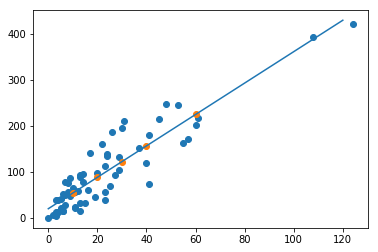

In [17]:
plt.scatter( data["claim_count"],data["claim_value"])
plt.plot([0,120], [point_1,point_2])

plt.scatter([10,20,30,40,60], claim_values , marker='o')

What were the original values though ? You can pick them up from the CSV. 

<img src="./pics/insurance_claims_actual_values.png"/>

In [18]:
original_claim_values = [65.3,98.1,194.5,119.4,202.4]

Let's also plot these to compare how well we predicted.

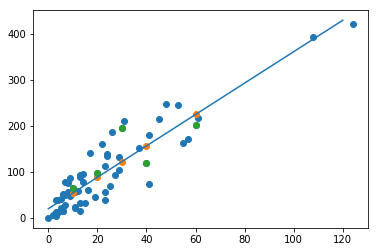

In [19]:
plt.scatter( data["claim_count"],data["claim_value"])
plt.plot([0,120], [point_1,point_2])

plt.scatter([10,20,30,40,60], claim_values , marker='o')
plt.scatter([10,20,30,40,60], original_claim_values , marker='o')


Some values are pretty close, some are a bit off - but nevertheless its a good prediction for the amount of time we spent doing it. 

### How did LinearRegression fit the straight line ?

The fun starts now. How did the **LinearRegression ( )** function fit the straight line ? How did it it arrive at this equation

Y = 3.4 X + 19.99

Obviously, there is no one straight line that will pass through all the points in this case.

<img src="./pics/best_fit.png"/>

If you take these 4 data points, we can eyeball a straight line that goes through the middle of it. The ones marked with question marks are visually not a good fit at all. But the question that linear model tries to solve is,

> What is the **"Optimum"** straight line that best describes the relationship between X and Y

This is where statistics comes in.

#### Let's zoom in

Let's simplify and make up some numbers ( for easy calculation) of claims vs payments. Say we have a set of 5 data points for claims vs payments and we wish to fit a linear model that can predict further data. This is a very small data set to do anything practical, but there is a reason why we are doing such a small data set as we will see in the coming sections.

<img src="./pics/claism_data.png"/>

Let's plot these on a graph.

<img src="./pics/claims_vs_payments.jpg"/>

If we were asked to eyeball a straight line that best fits these data points, this is how we would do it.

<img src="./pics/approximate_line.png"/>

How did we do it ? Our eye is essentially trying to **minimize the distances** from each of these points to the straight line. The best fitting straight line is one which minimizes the distances for all these points.

Linear regression in machine learning does exactly that - Instead of a human eye, machine learning takes the help of statistics to do this approximation. There are a couple of methods to do this in statistics.

- Ordinary Least Squares
- Gradient Descent